In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Step 1: Note that the data file has no columns. So define column names as 'sepal_length',
'sepal_width', 'petal_length','petal_width','class'. Read the csb file into a DataFrame and add the column names.
Check the head to become familiar with the dataset.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Week_5/iris.csv', names= ['sepal_length','sepal_width', 'petal_length','petal_width','class'])

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [6]:
df['class'] = df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Step 2: To gain an understanding of the data and how they fall in categories, use sns to visualize the data – sepal_length vs sepal_width and also plot petal_length vs petal_width with the three species as separator class.

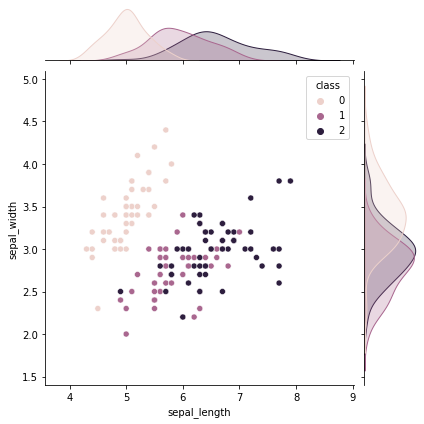

In [8]:
sns.jointplot(data = df , x = 'sepal_length' , y = 'sepal_width', hue='class')

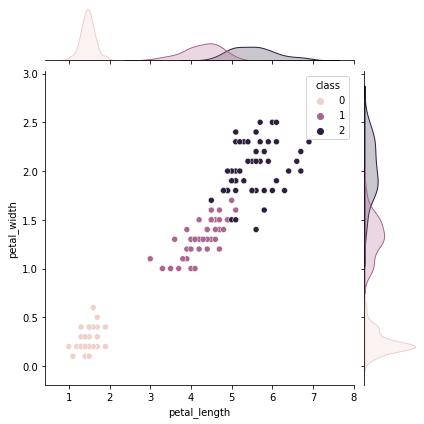

In [9]:
sns.jointplot(data = df , x = 'petal_length' , y = 'petal_width', hue='class')

Step 3: Split your data into training and testing. Choose test_size to be 0.3. Also do not forget to scale all
your features. Remember KNN can be affected by large values of certain features.


In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scale train and test dataset


In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Step 4: Build your KNN classifier. Choose K=1. Make predictions. Display confusion matrix and classification report. Comment on what you find.

In [14]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [15]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
y_pred = knn_model.predict(scaled_X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [18]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



**Comment on what you find**

When K = 1, it has 98% accuracy. For class 0 and 1, they are 100% correct. There is a 7% off for class number 2.

Step 5: To find an optimal K value, choose the elbow method and write code to find the error in a array. Plot the error-rate versus K. Where do you think is the low point of the elbow?

In [20]:
test_error_rates = []

for k in range(1,30):
  # test different K to find the best accuracy score
  knn_model_test = KNeighborsClassifier(n_neighbors = k)
  knn_model_test.fit(scaled_X_train, y_train)

  y_pred = knn_model_test.predict(scaled_X_test)
  test_error = 1 - accuracy_score(y_test, y_pred)
  test_error_rates.append(test_error)


Text(0.5, 0, 'k value')

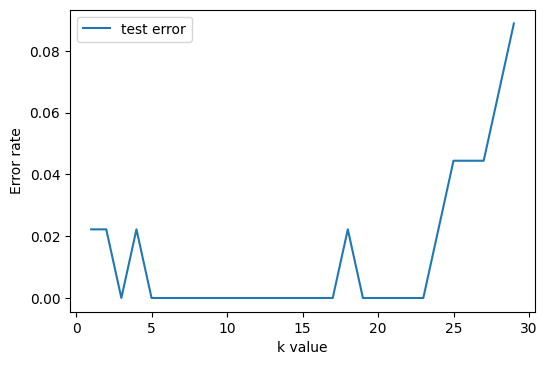

In [21]:
plt.figure(dpi=100)
plt.plot(range(1,30), test_error_rates,label = 'test error')
plt.legend()
plt.ylabel('Error rate')
plt.xlabel('k value')

The lowest points are the point has 0 error.

Step 6: Choose the row 40 from test data and feed that to your prediction classifier. What does it predict?

In [22]:
knn_model3 = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn_model3.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
y_pred3 = knn_model3.predict(scaled_X_test)

In [25]:
accuracy_score(y_test,y_pred3)

1.0

In [26]:
confusion_matrix(y_test, y_pred3)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [27]:
single_sample = X_test[40]
single_sample


array([5.8, 2.7, 5.1, 1.9])

In [28]:
# the model 3 predict row 40, answer is class 2
knn_model3.predict(single_sample.reshape(1,-1))

array([2])

In [29]:
# the real answer from the test data set is also 2, so it is correct
y_test[40]

2

In [30]:
# use dataframe to show the result and answer, so it can go vertical, won't use
# many spaces
result = pd.DataFrame(data = {'Answer': y_test, 'Predicted': y_pred3}).T
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
Answer,1,0,2,1,1,0,1,2,1,1,2,0,0,0,0,1,2,1,1,2,0,2,0,2,2,2,2,2,0,0,0,0,1,0,0,2,1,0,0,0,2,1,1,0,0
Predicted,1,0,2,1,1,0,1,2,1,1,2,0,0,0,0,1,2,1,1,2,0,2,0,2,2,2,2,2,0,0,0,0,1,0,0,2,1,0,0,0,2,1,1,0,0


In [31]:

# Questions:

# 1. with this small number do I still have to scale? I thought the scale only 
# needed when data has a big differernt between max and min value.

# 2. Why does the elbow figure looks different than the one we had in class? The 
# error become higher when neighbors are larger.

# 3. When there are multiple neighbors have same error (like lowest as 0 in this 
# case), which neighbor should I choose? In this case is it the lower the better?



In [32]:
# # predicted versus answer, all match! 

# s1 = "{0:<9} | {1:<9}".format("Predicted","Answer")
# s2 = "{0:<9} | {1:<9}".format("---------","-------")
# print(s1)
# print(s2)
# for p, a in zip( y_pred3, y_test):
#     s = "{0:<9} | {1:<9}".format(p,a)
#     print(s)